In [1]:
#Train deep learning models to predict age and gender.
#loading required library

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split


In [2]:
#loading UTK dataset and spiliting to age and gender set for training the model

path = "D:/finalProject/Age-Gender/Creato/UTKFace"
images = []
age = []
gender = []
for img in os.listdir(path):
  ages = img.split("_")[0]
  genders = img.split("_")[1]
  img = cv2.imread(str(path)+"/"+str(img))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  images.append(np.array(img))
  age.append(np.array(ages))
  gender.append(np.array(genders))

In [3]:
len(gender)

23708

In [3]:
age = np.array(age,dtype=np.int64)
images = np.array(images)  
gender = np.array(gender,np.uint64)

In [4]:
#Train and test spiliting of dataset for age and gender model

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(images, age, test_size=0.35, random_state=42)

x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(images, gender, test_size=0.35, random_state=42)


In [8]:
#training of gender model

gender_model = Sequential()

gender_model.add(Conv2D(36, kernel_size=3, activation='relu', input_shape=(200,200,3)))

gender_model.add(MaxPool2D(pool_size=3, strides=2))
gender_model.add(Conv2D(64, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(128, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(256, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(512, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Flatten())
gender_model.add(Dropout(0.2))
gender_model.add(Dense(512, activation='relu'))
gender_model.add(Dense(1, activation='sigmoid', name='gender'))

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_gender = gender_model.fit(x_train_gender, y_train_gender,
                        validation_data=(x_test_gender, y_test_gender), epochs=50)

gender_model.save('gender_model_50epochs.h5')


Epoch 1/50
482/482 [==============================] - 916s 2s/step - loss: 1.3350 - accuracy: 0.6802 - val_loss: 0.5017 - val_accuracy: 0.7563
Epoch 2/50
482/482 [==============================] - 889s 2s/step - loss: 0.4653 - accuracy: 0.7831 - val_loss: 0.3991 - val_accuracy: 0.8183
Epoch 3/50
482/482 [==============================] - 887s 2s/step - loss: 0.3970 - accuracy: 0.8166 - val_loss: 0.3537 - val_accuracy: 0.8402
Epoch 4/50
482/482 [==============================] - 887s 2s/step - loss: 0.3588 - accuracy: 0.8319 - val_loss: 0.3282 - val_accuracy: 0.8535
Epoch 5/50
482/482 [==============================] - 886s 2s/step - loss: 0.3386 - accuracy: 0.8469 - val_loss: 0.3340 - val_accuracy: 0.8444
Epoch 6/50
482/482 [==============================] - 883s 2s/step - loss: 0.3182 - accuracy: 0.8598 - val_loss: 0.3192 - val_accuracy: 0.8567
Epoch 7/50
482/482 [==============================] - 897s 2s/step - loss: 0.3076 - accuracy: 0.8629 - val_loss: 0.3169 - val_accuracy: 0.8566

In [12]:
print(gender_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 36)      1008      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 128)      0

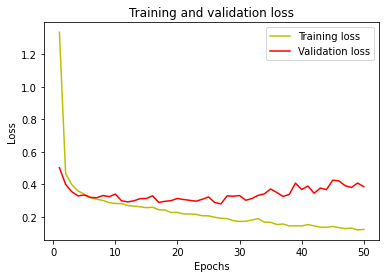

In [9]:

history = history_gender

#plot the training and validation accuracy and loss at each epoch

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

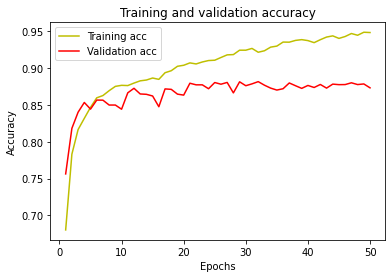

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

260/260 [==============================] - 71s 272ms/step
Accuracy =  0.8733429742106532


<AxesSubplot:>

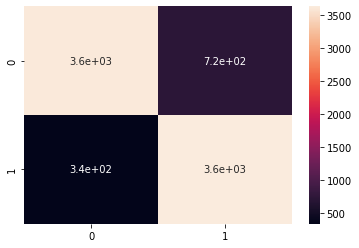

In [11]:
from keras.models import load_model
#Test the model
my_model = load_model('age_model_50epochs.h5', compile=False)


predictions = my_model.predict(x_test_gender)
y_pred = (predictions>= 0.5).astype(int)[:,0]

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test_gender, y_pred))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test_gender, y_pred)  
sns.heatmap(cm, annot=True)


In [5]:
#Training of age model

age_model = Sequential()
age_model.add(Conv2D(36, kernel_size=3, activation='relu', input_shape=(200,200,3)))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(64, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))
              
age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Flatten())
age_model.add(Dropout(0.3))
age_model.add(Dense(512, activation='relu'))

age_model.add(Dense(1, activation='linear', name='age'))
              
age_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print(age_model.summary())              
                           
history_age = age_model.fit(x_train_age, y_train_age, batch_size=64,
                        validation_data=(x_test_age, y_test_age), epochs=50)

age_model.save('age_model_50epochs.h5')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 36)      1008      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 128)      0

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (908402389.py, line 1)

In [2]:

history = history_age

#plot the training and validation loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'history_age' is not defined

In [1]:
#plot of validation and training mae loss
acc = history.history['mae']
val_acc = history.history['val_mae']

plt.plot(epochs, acc, 'y', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.title('Training and validation')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()


NameError: name 'history' is not defined